Column Names in the Dataset:
Index(['Accident_Index', 'Accident Date', 'Month', 'Day_of_Week', 'Year',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')
Dataset Preview:
  Accident_Index Accident Date Month Day_of_Week  Year  \
0  200901BS70001      1/1/2021   Jan    Thursday  2021   
1  200901BS70002      1/5/2021   Jan      Monday  2021   
2  200901BS70003      1/4/2021   Jan      Sunday  2021   
3  200901BS70004      1/5/2021   Jan      Monday  2021   
4  200901BS70005      1/6/2021   Jan     Tuesday  2021   

           Junction_Control          Junction_Detail Accident_Severity  \
0  Give way or uncontrolled  T or staggered junction   

<ipython-input-11-c1c0c3bd0744>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
<ipython-input-11-c1c0c3bd0744>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Accident Date'].dt.year
<ipython-input-11-c1c0c3bd0744>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

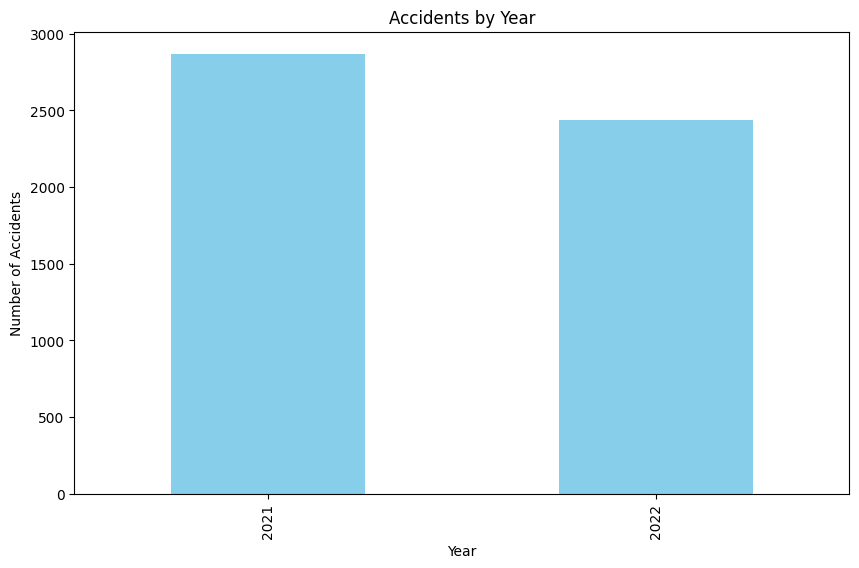


Top Accident Local Authorities:
Local_Authority_(District)
Cornwall                    54
County Durham               53
Leeds                       52
Birmingham                  51
Wiltshire                   46
Northumberland              42
East Riding of Yorkshire    39
Aberdeenshire               39
Swale                       36
Powys                       34
Name: count, dtype: int64


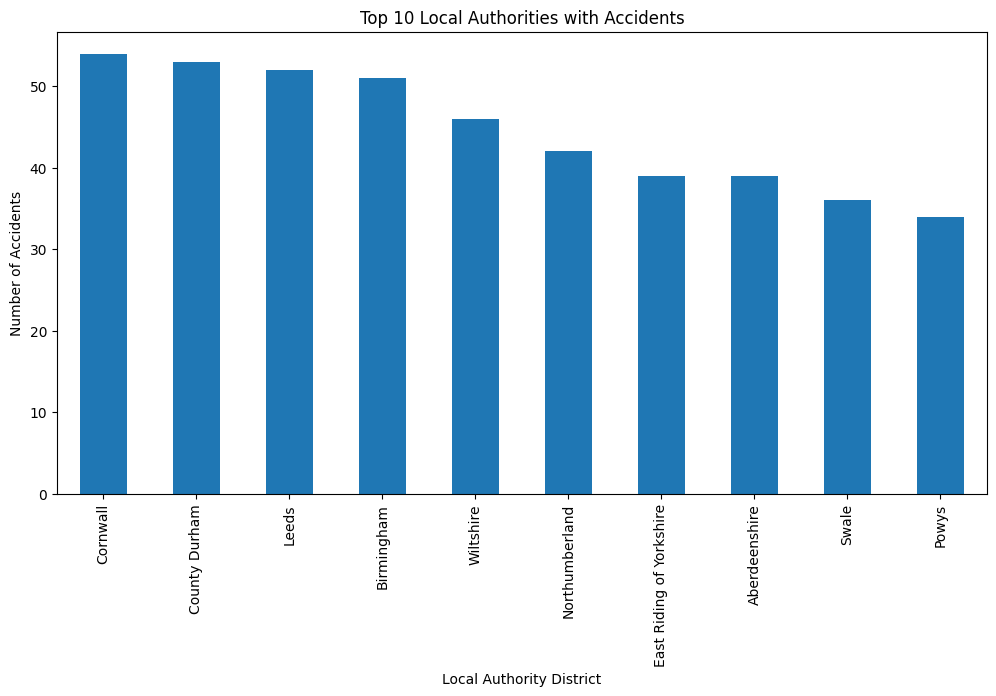


Accident Severity Distribution:
Accident_Severity
Slight     4461
Serious     771
Fatal        73
Name: count, dtype: int64


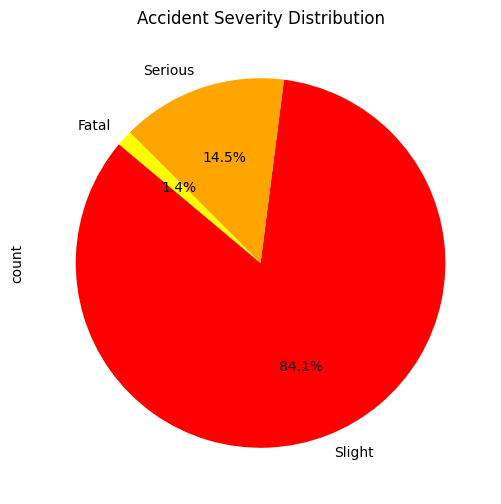

Correlation between number of casualties and vehicles involved: 0.29

Number of Vehicles in Accidents:


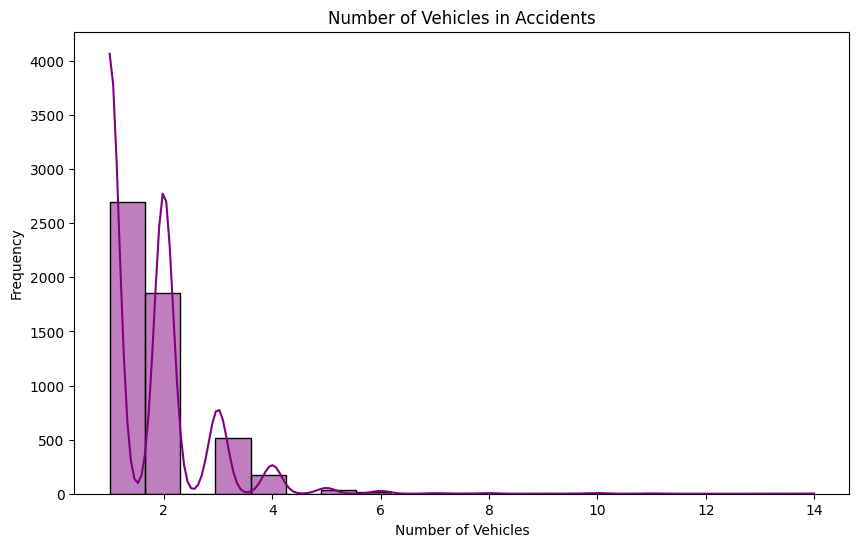


Accidents by Weather Conditions:
Weather_Conditions
Fine no high winds       4042
Raining no high winds     653
Other                     188
Raining + high winds      122
Snowing no high winds     120
Name: count, dtype: int64


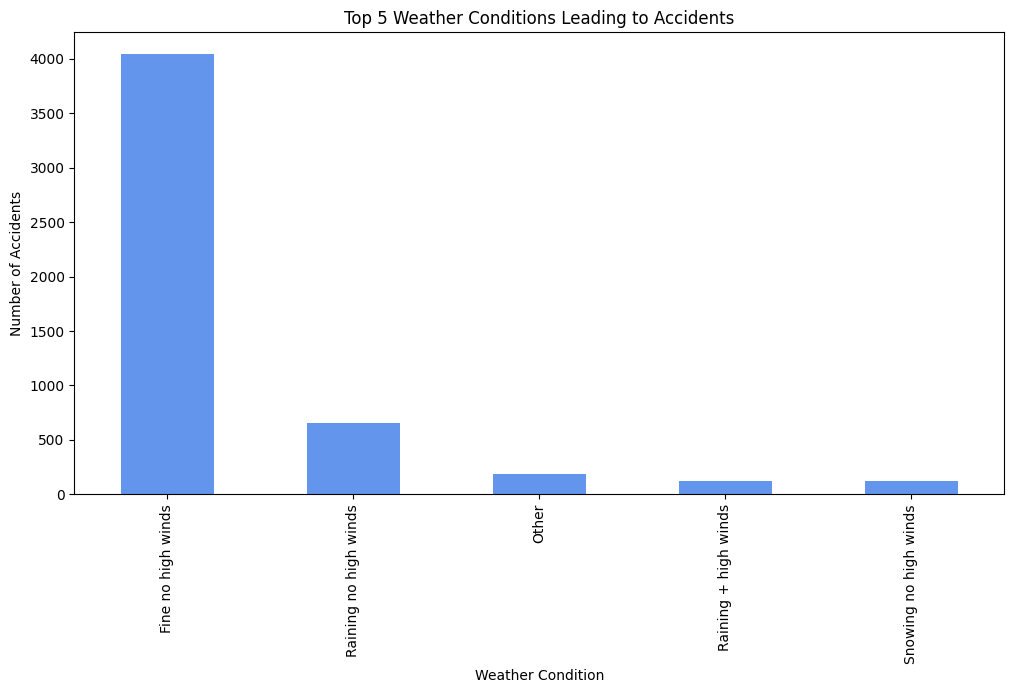


Accidents by Light Conditions:
Light_Conditions
Daylight                       3286
Darkness - no lighting         1028
Darkness - lights lit           907
Darkness - lighting unknown      50
Darkness - lights unlit          34
Name: count, dtype: int64


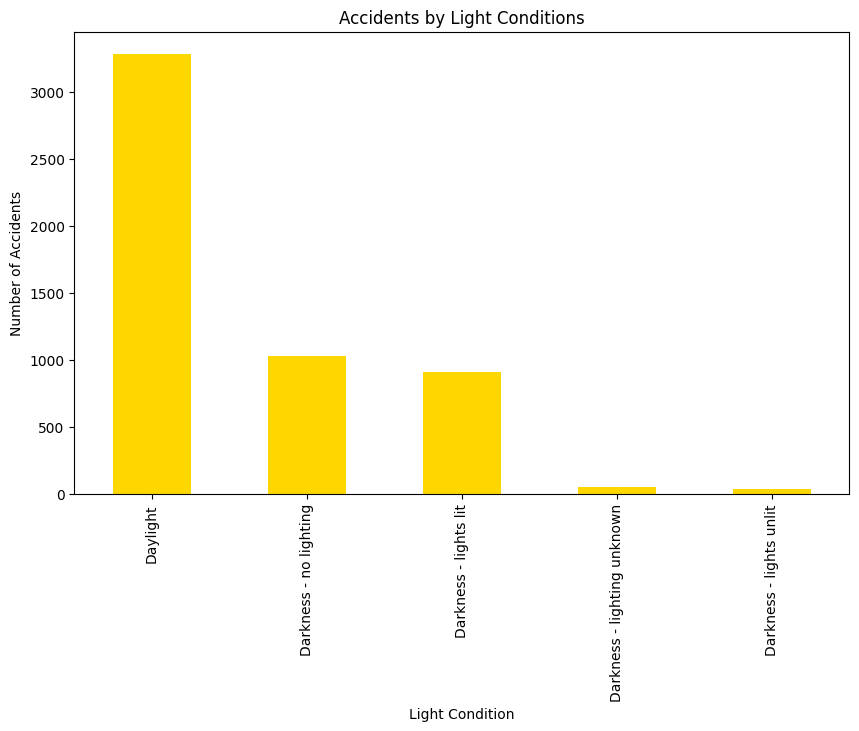


Most Frequent Vehicle Types Involved in Accidents:
Vehicle_Type
Car                                     4125
Van / Goods 3.5 tonnes mgw or under      275
Motorcycle over 500cc                    165
Bus or coach (17 or more pass seats)     162
Motorcycle 125cc and under               133
Name: count, dtype: int64


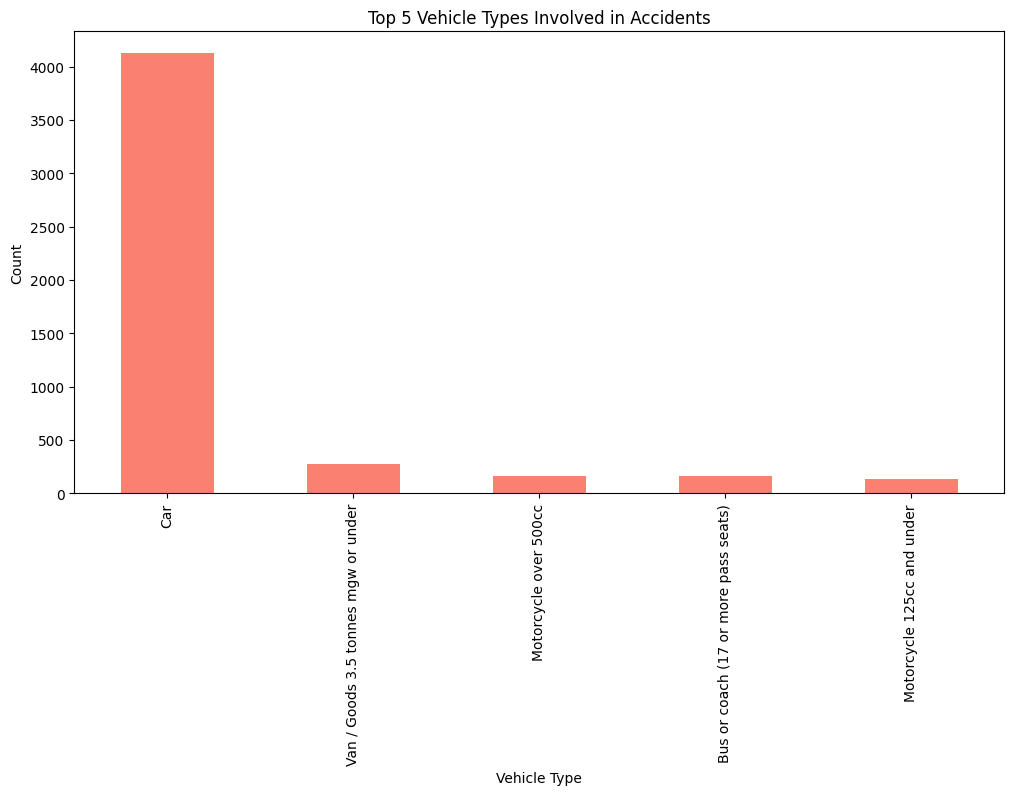


Accidents by Day of the Week:
day_of_week
Saturday     853
Friday       794
Sunday       764
Wednesday    759
Tuesday      756
Thursday     704
Monday       675
Name: count, dtype: int64


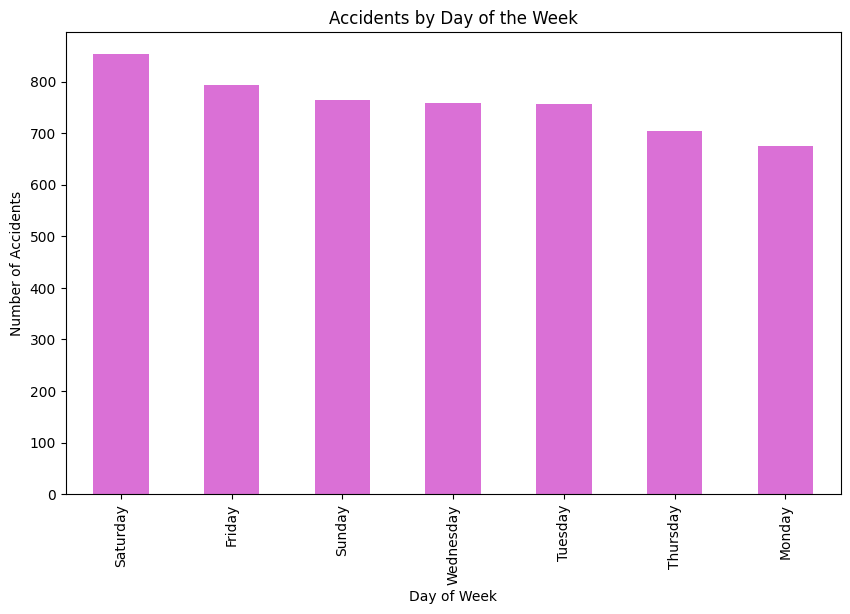


Accidents by Road Surface Conditions:
Road_Surface_Conditions
Dry                     3248
Wet or damp             1665
Frost or ice             270
Snow                     104
Flood over 3cm. deep      18
Name: count, dtype: int64


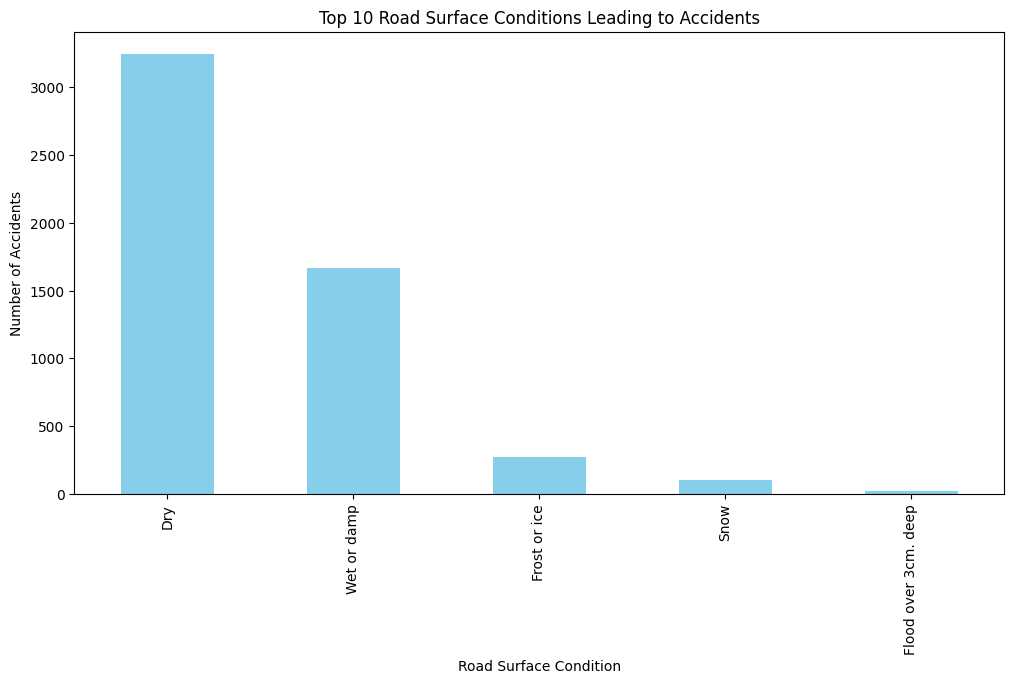


Number of Casualties Distribution:


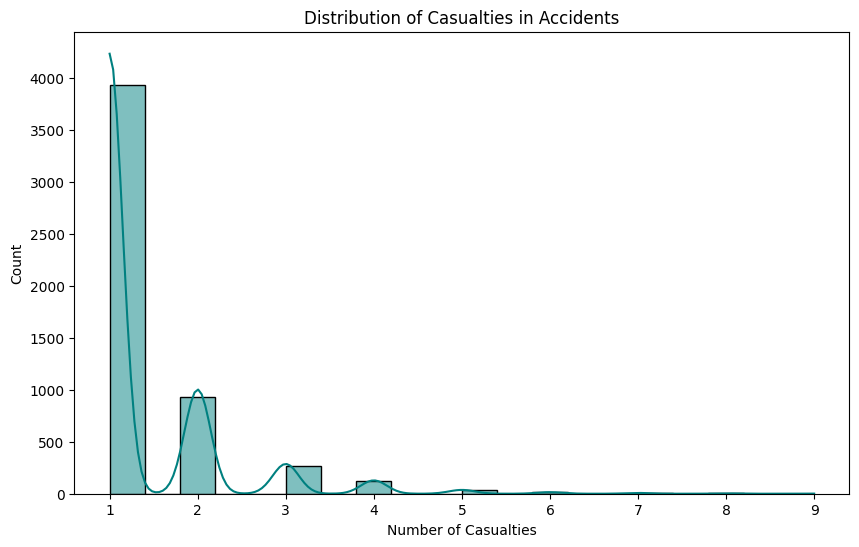


Accidents in Urban vs. Rural Areas:
Urban_or_Rural_Area
Rural    3174
Urban    2131
Name: count, dtype: int64


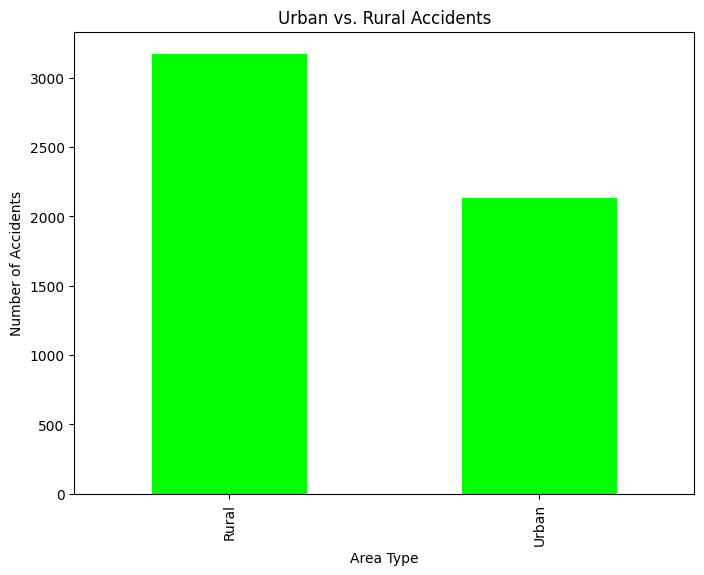

Analysis complete. Please review the visualizations and insights.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv("/content/Road Accident Data.csv")
print("Column Names in the Dataset:")
print(df.columns)

print("Dataset Preview:")
print(df.head())

print("\nDataFrame Information:")
print(df.info())

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # Dropping missing values for simplicity

# 1. Frequency of Accidents Over Time
print("\nTotal Number of Accidents:")
print(df.shape[0])

# Extract date components
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['year'] = df['Accident Date'].dt.year

df['month'] = df['Accident Date'].dt.month
df['day_of_week'] = df['Accident Date'].dt.day_name()

# Plot accidents by year
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# 2. Geographical Distribution
print("\nTop Accident Local Authorities:")
print(df['Local_Authority_(District)'].value_counts().head(10))

plt.figure(figsize=(12, 6))
df['Local_Authority_(District)'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Local Authorities with Accidents')
plt.xlabel('Local Authority District')
plt.ylabel('Number of Accidents')
plt.show()

# 3. Accident Severity Analysis
print("\nAccident Severity Distribution:")
print(df['Accident_Severity'].value_counts())

plt.figure(figsize=(8, 6))
df['Accident_Severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'orange', 'yellow'], startangle=140)
plt.title('Accident Severity Distribution')
plt.show()

# Correlation between severity and number of casualties
severity_casualties_corr, _ = pearsonr(df['Number_of_Casualties'], df['Number_of_Vehicles'])
print(f"Correlation between number of casualties and vehicles involved: {severity_casualties_corr:.2f}")

# 4. Demographic Insights
print("\nNumber of Vehicles in Accidents:")
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Vehicles'], bins=20, kde=True, color='purple')
plt.title('Number of Vehicles in Accidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# 5. Environmental and Road Conditions
print("\nAccidents by Weather Conditions:")
print(df['Weather_Conditions'].value_counts().head(5))

plt.figure(figsize=(12, 6))
df['Weather_Conditions'].value_counts().head(5).plot(kind='bar', color='cornflowerblue')
plt.title('Top 5 Weather Conditions Leading to Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

# Lighting conditions
print("\nAccidents by Light Conditions:")
print(df['Light_Conditions'].value_counts())

plt.figure(figsize=(10, 6))
df['Light_Conditions'].value_counts().plot(kind='bar', color='gold')
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.show()

# 6. Vehicle Information
print("\nMost Frequent Vehicle Types Involved in Accidents:")
print(df['Vehicle_Type'].value_counts().head(5))

plt.figure(figsize=(12, 6))
df['Vehicle_Type'].value_counts().head(5).plot(kind='bar', color='salmon')
plt.title('Top 5 Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

# 7. Temporal Patterns
print("\nAccidents by Day of the Week:")
print(df['day_of_week'].value_counts())

plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().plot(kind='bar', color='orchid')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

# 8. Road Surface Conditions
print("\nAccidents by Road Surface Conditions:")
print(df['Road_Surface_Conditions'].value_counts().head(10))

plt.figure(figsize=(12, 6))
df['Road_Surface_Conditions'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Road Surface Conditions Leading to Accidents')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.show()

# 9. Injury Analysis
print("\nNumber of Casualties Distribution:")
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Casualties'], bins=20, kde=True, color='teal')
plt.title('Distribution of Casualties in Accidents')
plt.xlabel('Number of Casualties')
plt.ylabel('Count')
plt.show()

# 10. Comparative Analysis
print("\nAccidents in Urban vs. Rural Areas:")
print(df['Urban_or_Rural_Area'].value_counts())

plt.figure(figsize=(8, 6))
df['Urban_or_Rural_Area'].value_counts().plot(kind='bar', color='lime')
plt.title('Urban vs. Rural Accidents')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.show()

print("Analysis complete. Please review the visualizations and insights.")
